# Rețele neuronale artificiale

<style>
    div.text_cell_render {
        max-width: 500px;  /* Limits text width */
        margin: auto;  /* Centers the content */
        text-align: justify;  /* Justifies text */
    }
</style>



**Rețelele neuronale artificiale** sunt modele computaționale inspirate de modul în care funcționează creierul uman. Acestea sunt formate din **neuroni artificiali** organizați în 
straturi și sunt utilizate pentru a **recunoaște modele** și a face **predicții** bazate pe date. 
Pentru antrenarea unei rețele neuronale se folosește un algoritm de optimizare, cum 
ar fi **Adam** sau **SGD**, și o **funcție de pierdere**, cum ar fi `binary_crossentropy` pentru **clasificare binară**.
Aceste rețele sunt esențiale pentru **învățarea automată**, iar 
aplicabilitatea lor este vastă, incluzând domenii precum **recunoașterea imaginilor**, **procesarea limbajului natural**, și multe altele.

**Clasificarea binară** este un tip de problemă de învățare automată în care un model trebuie să clasifice datele în una dintre două categorii posibile. Cu alte cuvinte, modelul 
ia o intrare și decide dacă aceasta aparține clasei 0 sau clasei 1.

**Exercițiu**: Alege un set dee date pentru a testa clasificarea binară. Creează o rețea neuronală de tip Dense cu 4 straturi, testând inițial cu un număr minim de neuroni (64, 32, 
16, 1). Apoi, îmbunătățește modelul prin creșterea numărului de neuroni în straturile Dense, adăugarea de straturi suplimentare, utilizarea BatchNormalization și aplicarea 
Dropout după anumite straturi.

## Importul bibliotecilor necesare

In [52]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.utils.class_weight import compute_class_weight

## Încărcarea și vizualizarea datasetului

In [53]:
df = pd.read_csv(r"C:\Users\filth\Desktop\an3sem2\ia\lab4\heart_disease_health_indicators_BRFSS2015.csv")
df.head(3)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0


## Descrierea datasetului

Acest dataset conține indicatori ai sănătății cardiovasculare, colectați prin sondaj, și este utilizat pentru a prezice riscul de boli de inimă sau atac de cord (**HeartDiseaseorAttack**).  

### Structura datasetului:
- Variabile binare: **HighBP** (Hipertensiune arterială), **Smoker** (Fumător), **Stroke** (Accident vascular cerebral), **PhysActivity** (Activitate fizică), etc.
- Variabile numerice: **BMI** (Indicele de masă corporală), **Age** (Vârsta), **MentHlth** (Sănătatea mentală) și **PhysHlth** (Sănătatea fizică).
- Alte variabile reflectă factori socio-economici, precum **Education** (Nivelul de educație) și **Income** (Venitul).

Scopul acestui dataset este de a construi un model de clasificare binară pentru a prezice prezența sau absența bolilor cardiovasculare pe baza acestor factori de sănătate și stil de viață.


In [54]:
df = df.dropna()

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

## Separarea datele de intrare (X) și a variabilei care să o prezicem (y)

In [56]:
X = df.drop(columns=['HeartDiseaseorAttack'])
y = df['HeartDiseaseorAttack']

## Normalizarea caracteristicilor 

In [57]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

## Împărțirea setului de date în seturi de antrenament și test

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Crearea și antrenarea primului model de rețea neuronală

In [59]:
print("Primul Model cu (64, 32, 16, 1) neuroni...")
model1 = Sequential([
    tf.keras.Input(shape=(21,)),  
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

model1.summary()

Primul Model cu (64, 32, 16, 1) neuroni...


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,033 (15.75 KB)

 Trainable params: 4,033 (15.75 KB)

 Non-trainable params: 0 (0.00 B)

Dupa cum poate fi observat mai sus, am construit un model de rețea neuronală folosind un tip de arhitectură `Sequential`. Acest model este conceput pentru a rezolva 
problema de clasificare binară, având 4 straturi dense (Fully Connected layers). Primele trei straturi au funcția de activare `ReLU`, care ajută rețeaua să învețe relații complexe 
în date, iar ultimul strat este un strat cu un singur neuron și funcția de activare `sigmoid`, care este adecvată pentru clasificarea binară (prezice valori între 0 și 1).

- **Primul strat**: Este definit ca un strat de intrare cu dimensiunea `(21,)`, ceea ce înseamnă că avem 21 de caracteristici în setul de date.
- **Straturile ascendente**: Straturile dense (64, 32, 16 neuroni) vor învăța reprezentări ale datelor pentru a prezice variabila țintă, care este "HeartDiseaseorAttack".
- **Ultimul strat**: Strat cu un neuron și funcția `sigmoid`, care produce probabilitatea ca instanța să aparțină unei clase (0 sau 1).

## Compilarea modelului cu funcția de pierdere și optimizatorul

In [60]:
model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

Modelul este compilat, ceea ce înseamnă că se definesc funcția de pierdere (loss function), optimizatorul și metrica de performanță care vor fi folosite în timpul procesului de 
antrenare. 

- **Optimizator**: `Adam` este un algoritm de optimizare adaptiv, care ajustează rata de învățare pe parcursul antrenării pentru a minimiza funcția de pierdere.
- **Funcția de pierdere**: `binary_crossentropy` este utilizată pentru problemele de clasificare binară, deoarece măsoară diferența între predicțiile modelului și valorile
reale ale etichetei (0 sau 1). Scopul modelului este de a minimiza această pierdere pe parcursul antrenării.
- **Metrică**: `accuracy` este utilizată pentru a evalua performanța modelului, indicând cât de corect sunt prezise etichetele pe baza setului de date de testare.

## Antrenarea modelului

In [61]:
history1 = model1.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step - accuracy: 0.9007 - loss: 0.2575 - val_accuracy: 0.9084 - val_loss: 0.2388
Epoch 2/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9080 - loss: 0.2362 - val_accuracy: 0.9085 - val_loss: 0.2374
Epoch 3/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9085 - loss: 0.2347 - val_accuracy: 0.9079 - val_loss: 0.2373
Epoch 4/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9090 - loss: 0.2350 - val_accuracy: 0.9080 - val_loss: 0.2366
Epoch 5/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9086 - loss: 0.2354 - val_accuracy: 0.9086 - val_loss: 0.2367
Epoch 6/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9097 - loss: 0.2335 - val_accuracy: 0.9082 - val_loss: 0.2366
Epoch 7/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9071 - loss: 0.2376 - val_accuracy: 0.9082 - val_loss: 0.2373
Epoch 8/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step - accuracy: 0.9095 - loss: 0

In outputul de mai sus, epochs=20 definește numărul de epoci (iterații complete asupra întregului set de date de antrenament). În acest caz, modelul va învăța timp de 20 
de epoci.
Metoda va returna un obiect history, care conține informații despre performanța modelului pe măsură ce progresează (precum acuratețea și pierderea pe datele 
de antrenament și validare).

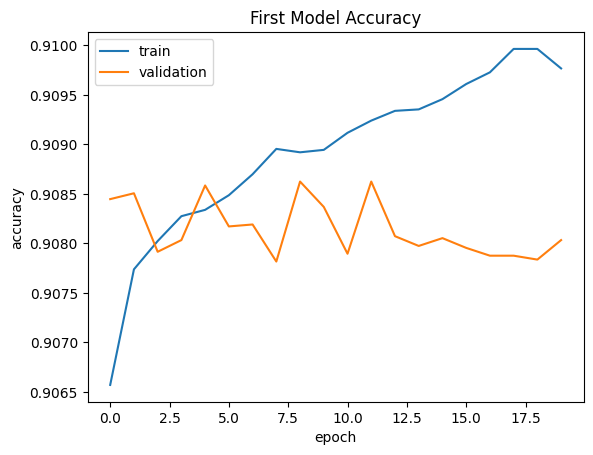

In [62]:
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('First Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

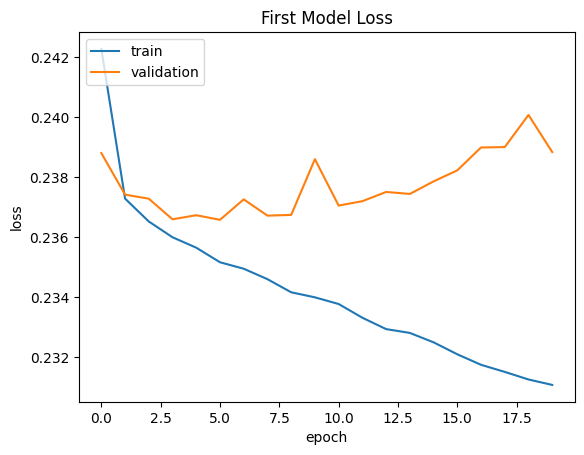

In [63]:
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('First Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [64]:
predictions1 = np.round(model1.predict(X_test))
print("First Model Accuracy:", accuracy_score(y_test, predictions1))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step  
First Model Accuracy: 0.908033743298644


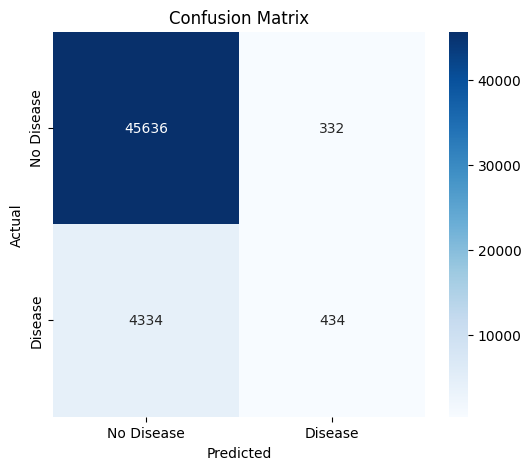

In [65]:
cm = confusion_matrix(y_test, predictions1)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [66]:
print(classification_report(y_test, predictions1))

              precision    recall  f1-score   support

         0.0       0.91      0.99      0.95     45968
         1.0       0.57      0.09      0.16      4768

    accuracy                           0.91     50736
   macro avg       0.74      0.54      0.55     50736
weighted avg       0.88      0.91      0.88     50736



## Antrenarea modelului îmbunătățit cu BatchNormalization și Dropout

In [68]:
print("Antrenarea modelului îmbunătățit cu BatchNormalization și Dropout...")
model2 = Sequential([
    tf.keras.Input(shape=(21,)),
    BatchNormalization(), 
    Dense(128, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(64, activation='relu'),
    Dropout(0.2),
    BatchNormalization(),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.summary()

Antrenarea modelului îmbunătățit cu BatchNormalization și Dropout...


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization_9           │ (None, 21)             │            84 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 128)            │         2,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,037 (54.83 KB)

 Trainable params: 13,611 (53.17 KB)

 Non-trainable params: 426 (1.66 KB)

In [17]:
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

In [18]:
history2 = model2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

Epoch 1/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - accuracy: 0.8877 - loss: 0.2787 - val_accuracy: 0.9084 - val_loss: 0.2393
Epoch 2/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9062 - loss: 0.2433 - val_accuracy: 0.9083 - val_loss: 0.2381
Epoch 3/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9067 - loss: 0.2410 - val_accuracy: 0.9077 - val_loss: 0.2376
Epoch 4/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9060 - loss: 0.2433 - val_accuracy: 0.9077 - val_loss: 0.2370
Epoch 5/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9070 - loss: 0.2410 - val_accuracy: 0.9078 - val_loss: 0.2368
Epoch 6/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9074 - loss: 0.2398 - val_accuracy: 0.9082 - val_loss: 0.2367
Epoch 7/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9075 - loss: 0.2398 - val_accuracy: 0.9084 - val_loss: 0.2362
Epoch 8/20
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step - accuracy: 0.9066 - loss: 0

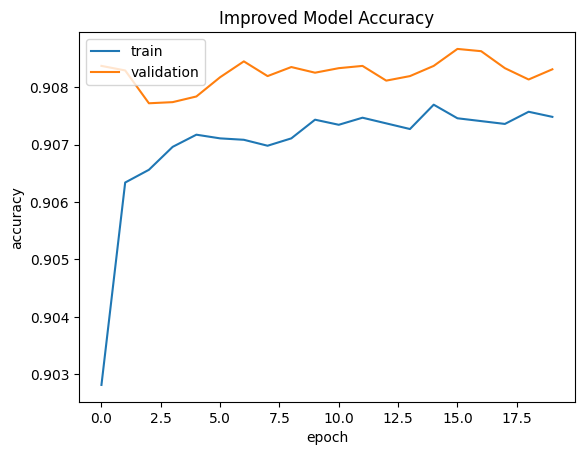

In [19]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Improved Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

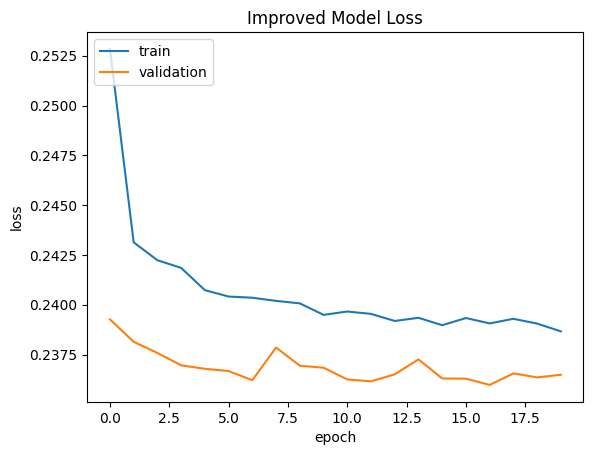

In [20]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Improved Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [21]:
predictions2 = np.round(model2.predict(X_test))
print("Improved Model Accuracy:", accuracy_score(y_test, predictions2))

1586/1586 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Improved Model Accuracy: 0.9083096814884895


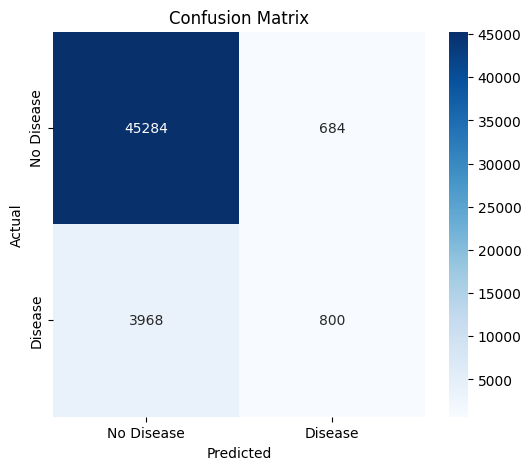

In [24]:
cm = confusion_matrix(y_test, predictions2)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["No Disease", "Disease"], yticklabels=["No Disease", "Disease"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [25]:
print(classification_report(y_test, predictions2))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45968
         1.0       0.54      0.17      0.26      4768

    accuracy                           0.91     50736
   macro avg       0.73      0.58      0.60     50736
weighted avg       0.88      0.91      0.89     50736



## Concluzie

În cadrul lucrării, am antrenat două modele de rețele neuronale pentru clasificarea binară a pacienților cu boală de inimă, folosind un set de date ce conține informații 
medicale. Primul model, un model de bază cu 3 straturi dense, a avut o acuratețe de aproximativ 91%. În continuare, am implementat un model îmbunătățit, adăugând 
tehnici de BatchNormalization și Dropout pentru a preveni supra-antrenarea și a îmbunătăți stabilitatea. Acuratețea acestui model a rămas similară, de aproximativ 91%, 
însă s-a observat o performanță ușor mai bună în prezicerea clasei 0 (sănătoși), în timp ce pentru clasa 1 (boală de inimă), performanța a rămas limitată.
În concluzie, deși tehnicile 
de îmbunătățire au avut un impact mic asupra acurateței generale, utilizarea BatchNormalization și Dropout a ajutat la stabilizarea procesului de antrenare, iar modelele au 
reușit să identifice mai bine pacienții sănătoși, dar cu dificultăți în identificarea corectă a pacienților cu boală de inimă.